In [1]:
# Load the CSV file into Spark DataFrame.

# Columns type will be identified automatically by adding .option('inferSchema','true')

import ibmos2spark
# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'service_id': '****',
    'iam_service_endpoint': 'https://iam.cloud.ibm.com/oidc/token',
    'api_key': '****'
}

configuration_name = 'os_8cbf59ff782d4a5db7683b1dceef1190_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .option('inferSchema','true')\
  .load(cos.url('First_Time_Buyer.csv', 'advanceddatasciencecapstone-donotdelete-pr-****'))



Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200810213457-0003
KERNEL_ID = 5d1389ed-dea2-4b16-89df-4e70641051f5


In [2]:
# quick look at data type to see if data types look fine.

df.dtypes

[('age_buy_property', 'int'),
 ('income_code', 'int'),
 ('months_income', 'int'),
 ('gender', 'string'),
 ('ethnic_group', 'string'),
 ('lsm', 'int'),
 ('riskscore', 'int'),
 ('months_risk_score', 'int'),
 ('has_email_addr', 'int'),
 ('has_mobile_phone', 'int'),
 ('months_mobile_phone', 'int'),
 ('has_home_phone', 'int'),
 ('months_home_phone', 'int'),
 ('has_work_phone', 'int'),
 ('months_work_phone', 'int'),
 ('contactability_score', 'int'),
 ('province', 'string'),
 ('years_occupation', 'int'),
 ('directorship', 'string'),
 ('citizenship', 'string'),
 ('credit_application_last_5yrs', 'int'),
 ('marital_status', 'string'),
 ('buyer', 'int')]

# Data Visualization

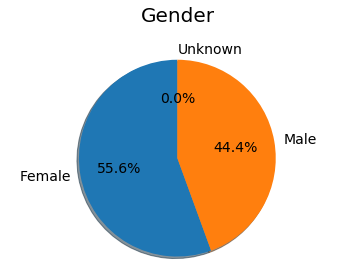

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

# by gender

dfcount = df.groupBy('gender').count().orderBy("gender").toPandas()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dfcount['gender'].tolist()
counts = dfcount['count'].tolist()


fig1, ax1 = plt.subplots()
ax1.pie(counts,  labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14},
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Gender\n', fontsize=20)

plt.show()

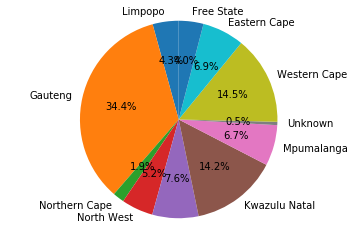

In [15]:
# by province

dfcount = df.groupBy('province').count().toPandas()

labels = dfcount['province'].tolist()
counts = dfcount['count'].tolist()

fig1, ax1 = plt.subplots()
ax1.pie(counts,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 

plt.show()

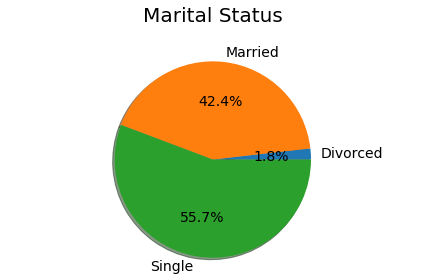

In [16]:
# by marital status

dfcount = df.groupBy('marital_status').count().orderBy("marital_status").filter(df.marital_status!='').toPandas()


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dfcount['marital_status'].tolist()
counts = dfcount['count'].tolist()


fig1, ax1 = plt.subplots()
ax1.pie(counts,  labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14}, 
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Marital Status\n', fontsize=20)

plt.tight_layout()

plt.show()

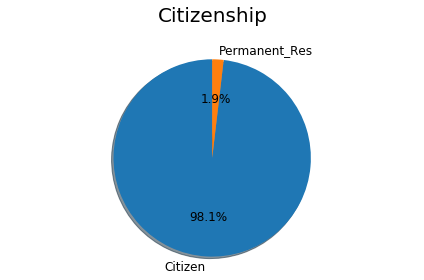

In [17]:
# by marital status

dfcount = df.groupBy('citizenship').count().orderBy("citizenship").filter(df.citizenship!='Unknown').toPandas()


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dfcount['citizenship'].tolist()
counts = dfcount['count'].tolist()


fig1, ax1 = plt.subplots()
ax1.pie(counts,  labels=labels, autopct='%1.1f%%', textprops={'fontsize': 12}, 
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Citizenship\n', fontsize=20)

plt.tight_layout()

plt.show()

# Data Quality Assessment

## 1. Univariate analysis

In [3]:
# Univariate Analysis gives some basic stats for each column. 

import pandas as pd

# show all columns names for a big DataFrame
pd.set_option('max_columns', None)

# generate descriptive statistics
df.describe().toPandas()

,summary,age_buy_property,income_code,months_income,gender,ethnic_group,lsm,riskscore,months_risk_score,has_email_addr,has_mobile_phone,months_mobile_phone,has_home_phone,months_home_phone,has_work_phone,months_work_phone,contactability_score,province,years_occupation,directorship,citizenship,credit_application_last_5yrs,marital_status,buyer
0,count,129190,129190,129190,129190,129190,128505,129190,129190,129190,129190,129190,129190,129190,129190,129190,129190,119425,110439,129190,129190,129190,128250,129190
1,mean,38.637897670098305,5.362094589364502,44.783148850530225,None,None,6.708478269328042,4.570918801764843,44.80056505921511,0.22009443455375802,0.9824754237944113,24.699326573264184,0.6314033593931418,31.34418298629925,0.8047681709110612,28.89768557937921,4.723252573728617,None,5.523193799291917,None,None,0.0077792398792476194,None,0.47454911370849134
2,stddev,11.402477541071114,2.6238078602830877,5.115444168806087,None,None,2.5264815054914815,1.0205443766671365,5.060383250864766,0.4143117221705952,0.13121584777711198,28.310566873236947,0.4824261172799398,49.840951853342034,0.39638059762554645,41.02136174999999,1.1471290190074515,None,3.32612346360776,None,None,0.08785660506573258,None,0.4993537649024999
3,min,20,1,26,Female,BLACK,1,2,26,0,0,0,0,0,0,0,2,Eastern Cape,2,DIRECTORSHIP ACTIVE,Citizen,0,Divorced,0
4,max,80,11,90,Unknown,WHITE,10,6,90,1,1,1447,1,1447,1,1447,7,Western Cape,120,DIRECTORSHIP UNKNOWN,Unknown,1,Single,1


Count of all columns don't match, so there might be missing values, which will be checked later.

In addition, few columns have a huge maximum value compared to mean and stddev (mean+3 stddev), As can be seen in **max** row. These columns, should be checked throughly for treating possible outliers.

* mths_mobile_phone

* months_home_phone

* months_work_phone

* years_occupation

## Variable Identification

X = all variables except the last column, buyer.

y = buyer


## Problem type

Is an indivisual a buyer or non-buyer (**Yes/No**) => **Classification problem**

### Numerical Values analysis

#### Check if the data is imbalanced

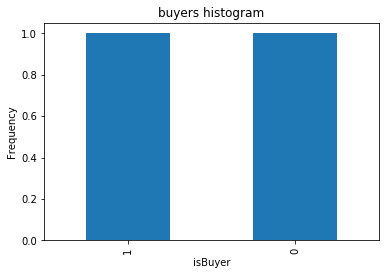

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline


# Count each buyer type and save it as a Pandas DataFrame
buyers_count = df.groupBy('buyer').count().toPandas()

# plot the histogram
pd.value_counts(buyers_count['buyer']).plot.bar()
plt.title('buyers histogram')
plt.xlabel('isBuyer')
plt.ylabel('Frequency');

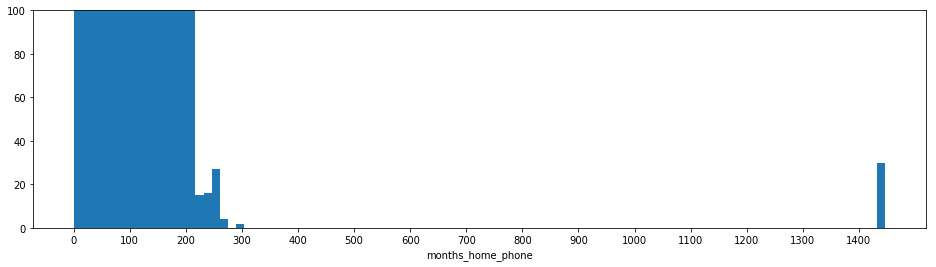

In [5]:
df.createOrReplaceTempView('dftable')
months_home_phone=spark.sql("select months_home_phone from dftable where months_home_phone is not null")

# create array
months_home_phone_array = months_home_phone.rdd.map(lambda row: row.months_home_phone).collect()

# plot histogram
plt.figure(figsize=(16,4))
plt.hist(months_home_phone_array, bins=100);
plt.xticks(range(0,1401,100));
plt.xlabel("months_home_phone");

# limit the y axis to see less frequent bins
plt.ylim([0,100]);

There are some outlier over 1400 months (over 100 years). These values can be removed or reset to a new values, for example the maximum months observed, 300 months (25 years).

It is the same for mths_mobile_phone, and months_work_phone

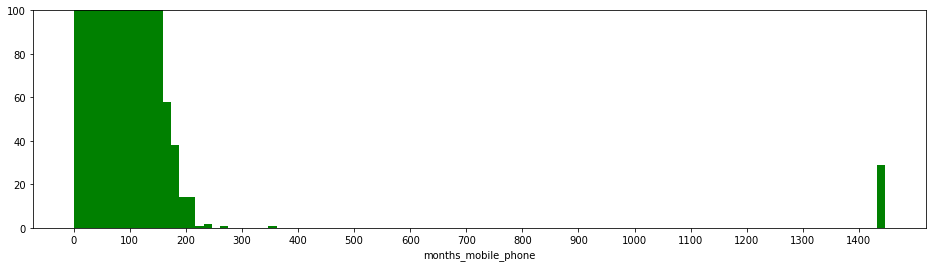

In [6]:
# check months_mobile_phone 

months_mobile_phone=spark.sql("select months_mobile_phone from dftable where months_mobile_phone is not null")

months_mobile_phone_array = months_mobile_phone.rdd.map(lambda row: row.months_mobile_phone).collect()


plt.figure(figsize=(16,4))
plt.hist(months_mobile_phone_array, bins=100, color='g');
plt.xticks(range(0,1401,100));
plt.xlabel("months_mobile_phone");

# limit the y axis to see less frequent bins
plt.ylim([0,100]);

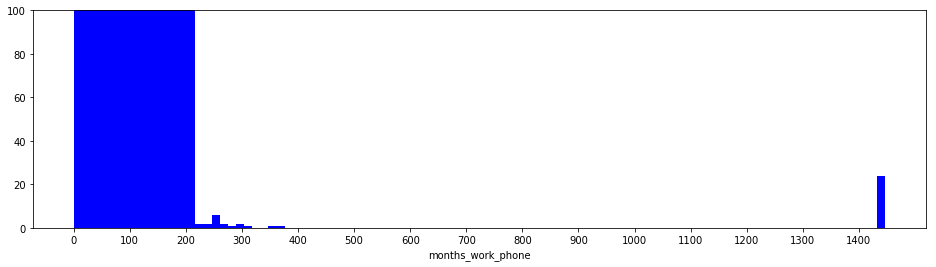

In [7]:
# check months_work_phone
months_work_phone=spark.sql("select months_work_phone from dftable where months_work_phone is not null")

months_work_phone_array = months_work_phone.rdd.map(lambda row: row.months_work_phone).collect()


plt.figure(figsize=(16,4))
plt.hist(months_work_phone_array, bins=100, color='b');
plt.xticks(range(0,1401,100));
plt.xlabel("months_work_phone");

# limit the y axis to see less frequent bins
plt.ylim([0,100]);

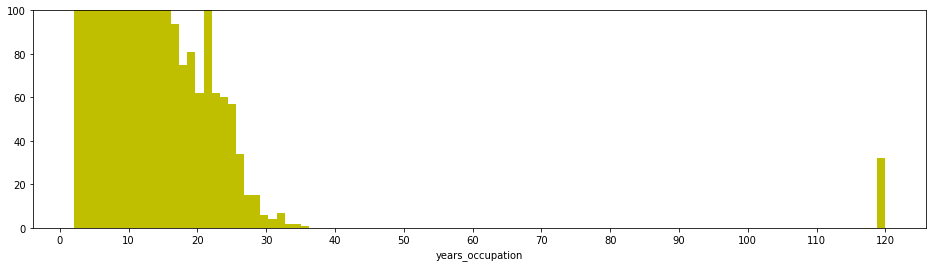

In [8]:
# check years_occupation => maximum meaningful year is 35 years

years_occupation=spark.sql("select years_occupation from dftable where years_occupation is not null")

years_occupation_array = years_occupation.rdd.map(lambda row: row.years_occupation).collect()


plt.figure(figsize=(16,4))
plt.hist(years_occupation_array, bins=100, color='y');
plt.xticks(range(0,121,10));
plt.xlabel("years_occupation");

# limit the y axis to see less frequent bins
plt.ylim([0,100]);

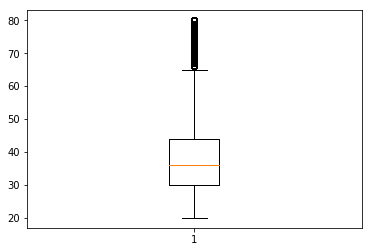

In [9]:
# check the age of individuals when bought a property

age=spark.sql("select age_buy_property from dftable where age_buy_property is not null")

age_array = age.rdd.map(lambda row: row.age_buy_property).collect()

plt.boxplot(age_array)
plt.show();

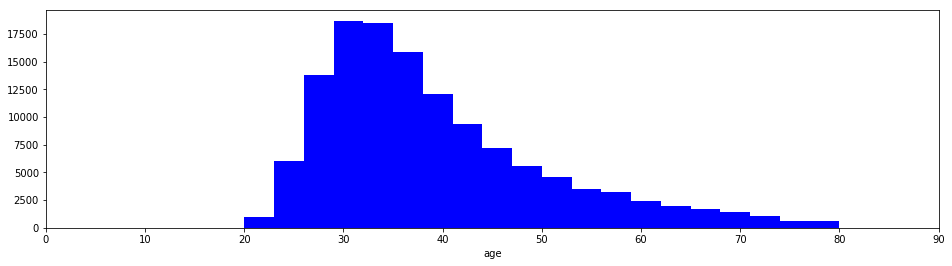

In [10]:
# Age histogram

plt.figure(figsize=(16,4))
plt.hist(age_array, bins=20, color='b');
plt.xlabel("age");
plt.xticks(range(0,91,10));

Age has a long tail, but no obvious outlier is seen. To make the distribution shape more symetric, log(age) can be used.

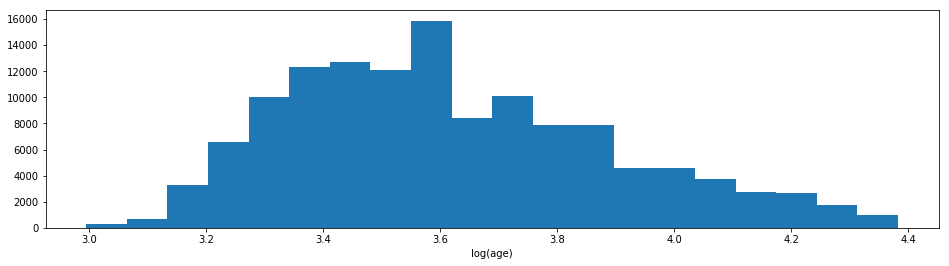

In [11]:
# transform the age
import numpy as np

plt.figure(figsize=(16,4))
plt.hist(np.log(age_array), bins=20);
plt.xlabel("log(age)");

Now the age distribution is more symetric; its effect on model performace will be examined later.

### Categorical variables analysis

In [12]:
# Categorical variables unique values

categorical_cols=[]

for el in df.dtypes:
    if el[1]=='string':
        col=el[0]
        categorical_cols.append(col)
        distinct_column_vals = df.select(col).distinct().collect()
        distinct_column_vals = [v[col] for v in distinct_column_vals]
        print(col,': %s\n'%distinct_column_vals)
        

gender : ['Female', 'Unknown', 'Male']

ethnic_group : ['WHITE', 'BLACK', 'OTHER', 'INDIAN']

province : ['Limpopo', 'Gauteng', 'Northern Cape', 'North West', None, 'Kwazulu Natal', 'Mpumalanga', 'Unknown', 'Western Cape', 'Eastern Cape', 'Free State']

directorship : ['DIRECTORSHIP ACTIVE', 'DIRECTORSHIP DISQUALIFIED', 'DIRECTORSHIP RESIGNED', 'DIRECTORSHIP UNKNOWN', 'DIRECTORSHIP INVALID CODE', 'DIRECTORSHIP INACTIVE', 'DIRECTORSHIP REMOVE', 'DIRECTORSHIP DECEASED']

citizenship : ['Unknown', 'Permanent_Res', 'Citizen']

marital_status : [None, 'Married', 'Divorced', 'Single']



As shown above, all the variables look fine except directorship. I am only interested in an individual is an **active director** or a **resigned director** or **not a director**. So all the other values except **DIRECTORSHIP ACTIVE** and **DIRECTORSHIP RESIGNED** must be changed to **NO DIRECTORSHIP**.

# 2. Bivariate analysis

## pairplot

/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufu

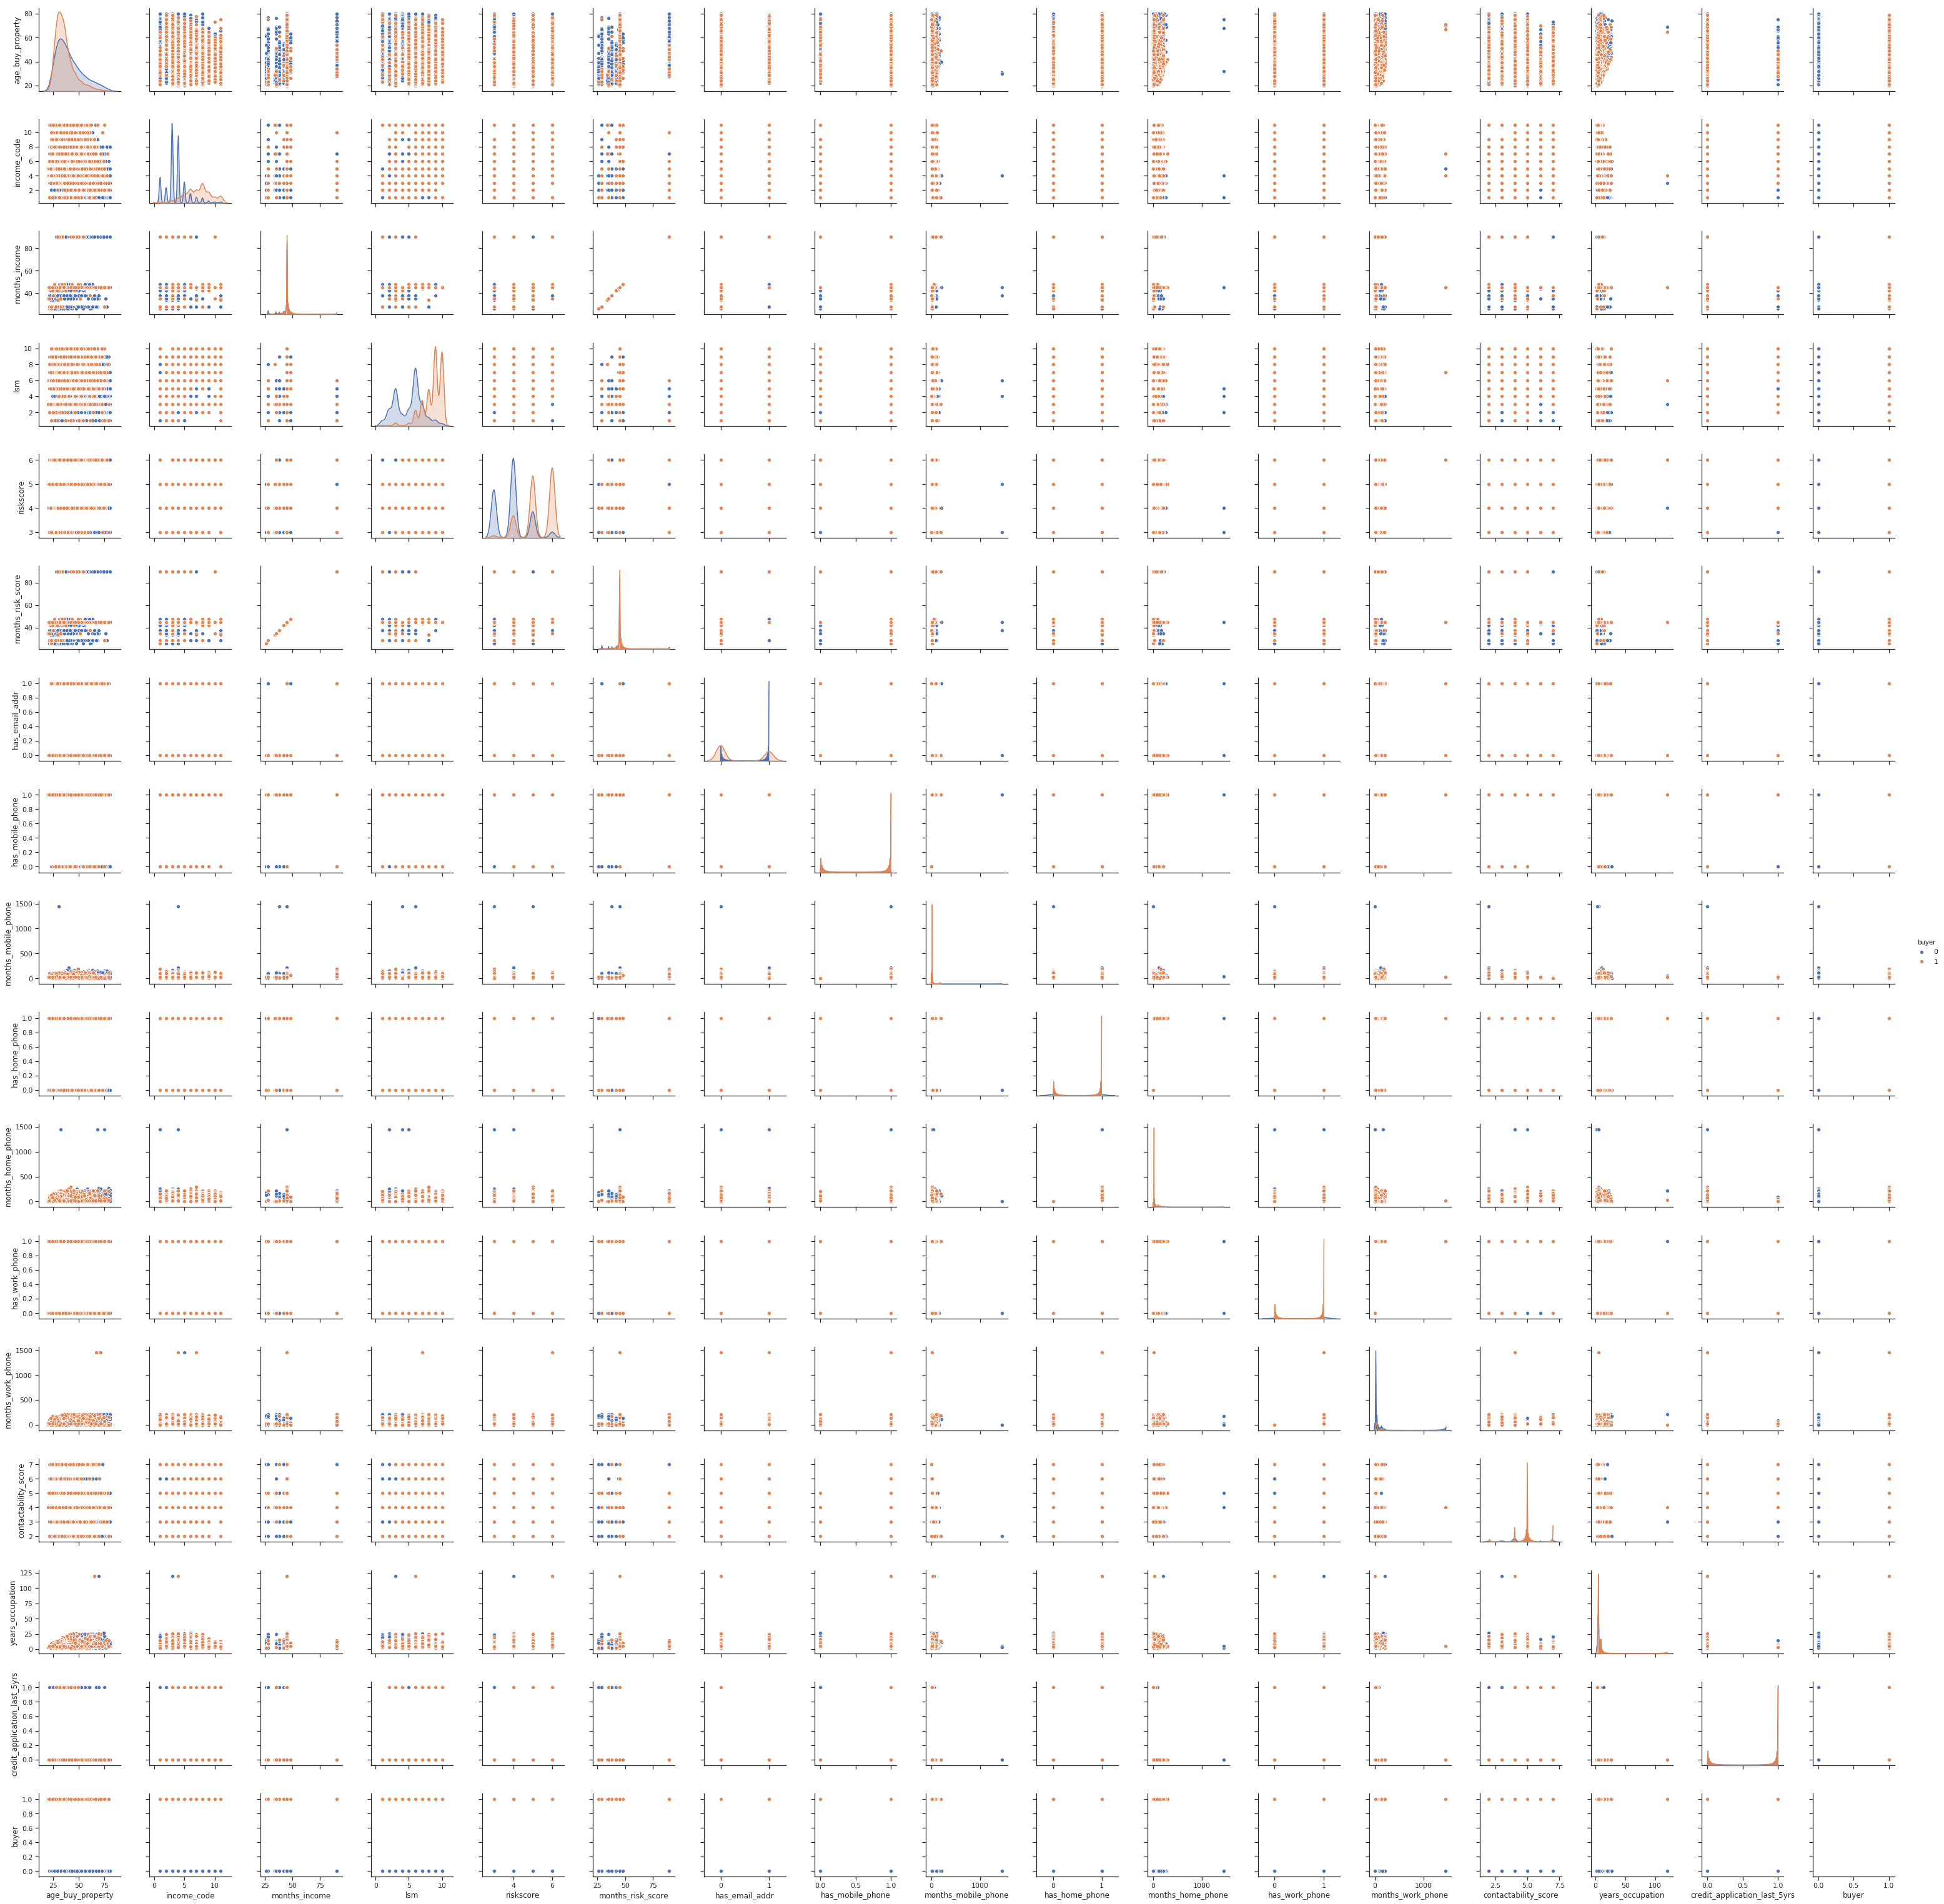

In [18]:
# Bi-variate Analysis, colured by buyer type

import seaborn as sns

# create a subset of data (around 12,000 data points)
subset = df.sample(False, 0.1)

sns.set(style="ticks")

sns.pairplot(subset.toPandas(), hue="buyer")
plt.show()



According to above charts, most of the data are discrete values.

In addition, some correlations are observed, which can be shown in a better way by calculating the correlation matrix.

## pair correlation analysis

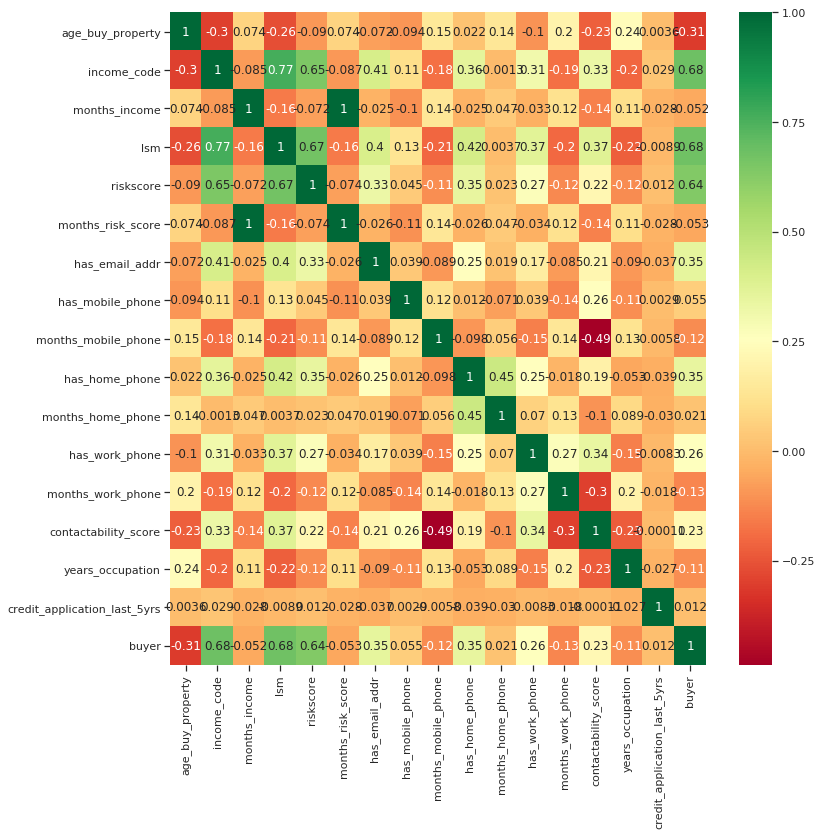

In [22]:
# calculate the correlation matrix

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# drop categorical columns
df_numeric = df.drop(*categorical_cols)

# drop nan values
df_numeric = df_numeric.dropna(how='any')

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df_numeric.columns, outputCol=vector_col)
df_vector = assembler.transform(df_numeric).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmat = matrix.toArray().tolist()



#plot heat map graph
plt.figure(figsize=(12,12))

g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn", xticklabels=df_numeric.columns, yticklabels=df_numeric.columns)

As can be seen, there is perfect correlation between **income_code** and **months_risk_score**; so the latter will be removed.

In addition, there is some sort of correlation between **LSM** and **income_code**; but it's not a strong correlation; so both will be kept.

# Missing values analysis

In [23]:
#  Let's check the number of missing values.

import pyspark.sql.functions as sqlfuncs

print('Number of missing values in:')

ndata=df.count()
found=False
for col,col_dtype in df.dtypes:
    nMissing = df.select(col).withColumn('isNull_col',sqlfuncs.col(col).isNull()).where('isNull_col = True').count()
    
    if nMissing:
        found=True
        print('    %23s: \t%6s (%.1f%%)'%(col,nMissing, nMissing/ndata*100))
        
if not found:
    print("No missing values found")

Number of missing values in:
                        lsm: 	   685 (0.5%)
                   province: 	  9765 (7.6%)
           years_occupation: 	 18751 (14.5%)
             marital_status: 	   940 (0.7%)


## LSM
LSM is Living Standard Measure and it depends on several factors such as income. The missing values can be imputed using the LSM values with the same income_code and/or province or marital status.

##  province
Province is a categorical variable, as seen previously. The missing province values is considered to be **UNKNOWN**. 

## years_occupation
This column has numerical values. Null values means the idividual does not have any job, so **years_occupation** is set to **ZERO**.

## marital_status
It's a categorical variable. The missing marital status is set to **UNKNOWN**.